Name : Jyotiska Bose 
Roll No: 22053164

Batch Gradient Descent:
Theta0: 0.9614732804290486, Theta1: 0.13129185886702174
Final Cost: 0.00021872477514671957
Stochastic Gradient Descent:
Theta0: 0.9953726497676834, Theta1: 0.00790933516035793
Final Cost: 1.5283228759114732e-06
Mini-Batch Gradient Descent:
Theta0: 0.9945231544159953, Theta1: 0.00810454296960351
Final Cost: 1.1953736932861157e-06


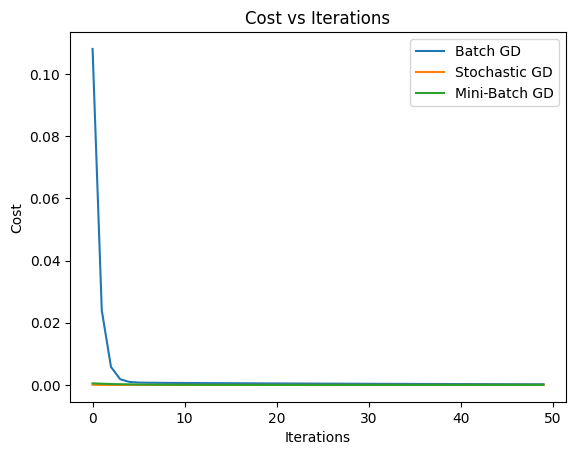

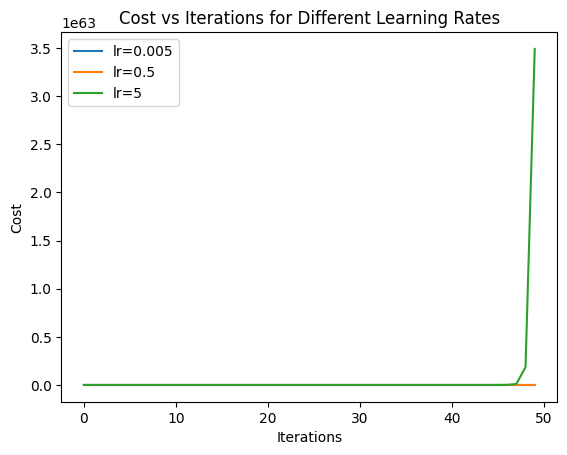

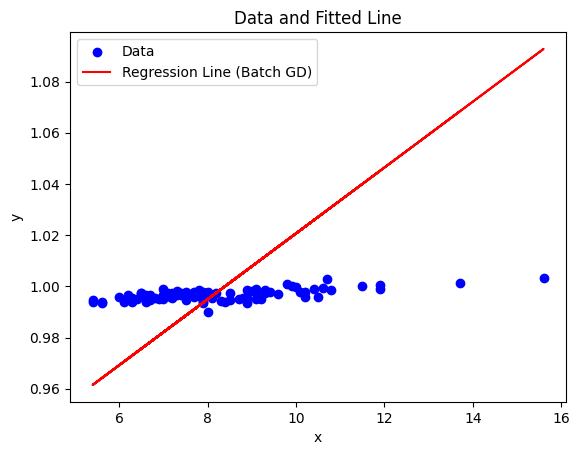

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_path = "linearX.csv"
y_path = "linearY.csv"

x_data = pd.read_csv(x_path, header=None)
y_data = pd.read_csv(y_path, header=None)

x = x_data[0].values
y = y_data[0].values

x_norm = (x - np.min(x)) / (np.max(x) - np.min(x))

learning_rate = 0.5
max_iterations = 50
convergence_threshold = 1e-6
batch_size = 10

def compute_cost(theta0, theta1, x, y):
    m = len(y)
    predictions = theta0 + theta1 * x
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(x, y, lr, max_iterations, convergence_threshold):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for i in range(max_iterations):
        predictions = theta0 + theta1 * x
        d_theta0 = (1 / m) * np.sum(predictions - y)
        d_theta1 = (1 / m) * np.sum((predictions - y) * x)
        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1
        cost = compute_cost(theta0, theta1, x, y)
        cost_history.append(cost)
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < convergence_threshold:
            break

    return theta0, theta1, cost_history

def stochastic_gradient_descent(x, y, lr, max_iterations):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for i in range(max_iterations):
        for j in range(m):
            predictions = theta0 + theta1 * x[j]
            d_theta0 = predictions - y[j]
            d_theta1 = (predictions - y[j]) * x[j]
            theta0 -= lr * d_theta0
            theta1 -= lr * d_theta1
        cost = compute_cost(theta0, theta1, x, y)
        cost_history.append(cost)

    return theta0, theta1, cost_history

def mini_batch_gradient_descent(x, y, lr, max_iterations, batch_size):
    m = len(y)
    theta0, theta1 = 0, 0
    cost_history = []

    for i in range(max_iterations):
        indices = np.random.permutation(m)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for j in range(0, m, batch_size):
            x_batch = x_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]
            predictions = theta0 + theta1 * x_batch
            d_theta0 = (1 / len(y_batch)) * np.sum(predictions - y_batch)
            d_theta1 = (1 / len(y_batch)) * np.sum((predictions - y_batch) * x_batch)
            theta0 -= lr * d_theta0
            theta1 -= lr * d_theta1
        cost = compute_cost(theta0, theta1, x, y)
        cost_history.append(cost)

    return theta0, theta1, cost_history

def plot_cost_vs_iterations(cost_history, label):
    plt.plot(range(len(cost_history)), cost_history, label=label)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost vs Iterations")
    plt.legend()

theta0_bgd, theta1_bgd, cost_history_bgd = gradient_descent(x_norm, y, learning_rate, max_iterations, convergence_threshold)
theta0_sgd, theta1_sgd, cost_history_sgd = stochastic_gradient_descent(x_norm, y, learning_rate, max_iterations)
theta0_mbgd, theta1_mbgd, cost_history_mbgd = mini_batch_gradient_descent(x_norm, y, learning_rate, max_iterations, batch_size)

print(f"Batch Gradient Descent:")
print(f"Theta0: {theta0_bgd}, Theta1: {theta1_bgd}")
print(f"Final Cost: {cost_history_bgd[-1]}")

print(f"Stochastic Gradient Descent:")
print(f"Theta0: {theta0_sgd}, Theta1: {theta1_sgd}")
print(f"Final Cost: {cost_history_sgd[-1]}")

print(f"Mini-Batch Gradient Descent:")
print(f"Theta0: {theta0_mbgd}, Theta1: {theta1_mbgd}")
print(f"Final Cost: {cost_history_mbgd[-1]}")

plot_cost_vs_iterations(cost_history_bgd, label="Batch GD")
plot_cost_vs_iterations(cost_history_sgd, label="Stochastic GD")
plot_cost_vs_iterations(cost_history_mbgd, label="Mini-Batch GD")
plt.show()

learning_rates = [0.005, 0.5, 5]
for lr in learning_rates:
    theta0, theta1, cost_history = gradient_descent(x_norm, y, lr, max_iterations, convergence_threshold)
    plt.plot(range(len(cost_history)), cost_history, label=f"lr={lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations for Different Learning Rates")
plt.legend()
plt.show()

plt.scatter(x, y, color="blue", label="Data")
plt.plot(x, theta0_bgd + theta1_bgd * x_norm, color="red", label="Regression Line (Batch GD)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data and Fitted Line")
plt.legend()
plt.show()
